In [1]:
!pip install pyautogen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


In [2]:
import autogen

In [3]:
config_list=autogen.config_list_from_json(env_or_file="/content/OAI_CONFIG_LIST")

In [4]:
import io

from IPython.display import display
from PIL import Image

import autogen
from autogen.agentchat import AssistantAgent, UserProxyAgent
from autogen.agentchat.contrib.gpt_assistant_agent import GPTAssistantAgent

In [6]:
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config={
        "config_list": config_list,
    },
    assistant_config={
        "tools": [{"type": "code_interpreter"}],
    },
    instructions="You are an expert at writing python code to solve problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy = UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    },
    human_input_mode="NEVER",
)

user_proxy.initiate_chat(
    gpt_assistant,
    message="Draw a line chart to show the population trend in US. Show how you solved it with code.",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    human_input_mode="NEVER",
    clear_history=True,
    max_consecutive_auto_reply=1,
)

user_proxy (to Coder Assistant):

Draw a line chart to show the population trend in US. Show how you solved it with code.

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

To draw a line chart to show the population trend in the US, I need actual data for the US population over a certain period of years. Since we don't have internet access in this environment to fetch real-time data, I'll need to use some sample data to create the line chart.

I'll be using hypothetical population data for this example. Let's say we have the following data for the US population from 1990 to 2020 (in millions):

- 1990: 250 million
- 1995: 260 million
- 2000: 282 million
- 2005: 295 million
- 2010: 309 million
- 2015: 321 million
- 2020: 331 million

Now I'll write the Python code to create a line chart using this data.


Received file id=file-oHUjRWqs8J9CeWmmJJXqiEZ6

Here is the line chart that shows the hypothetical trend of the US pop

ChatResult(chat_id=None, chat_history=[{'content': 'Draw a line chart to show the population trend in US. Show how you solved it with code.', 'role': 'assistant'}, {'content': "To draw a line chart to show the population trend in the US, I need actual data for the US population over a certain period of years. Since we don't have internet access in this environment to fetch real-time data, I'll need to use some sample data to create the line chart.\n\nI'll be using hypothetical population data for this example. Let's say we have the following data for the US population from 1990 to 2020 (in millions):\n\n- 1990: 250 million\n- 1995: 260 million\n- 2000: 282 million\n- 2005: 295 million\n- 2010: 309 million\n- 2015: 321 million\n- 2020: 331 million\n\nNow I'll write the Python code to create a line chart using this data.\n\n\nReceived file id=file-oHUjRWqs8J9CeWmmJJXqiEZ6\n\nHere is the line chart that shows the hypothetical trend of the US population from 1990 to 2020. As you can see, t

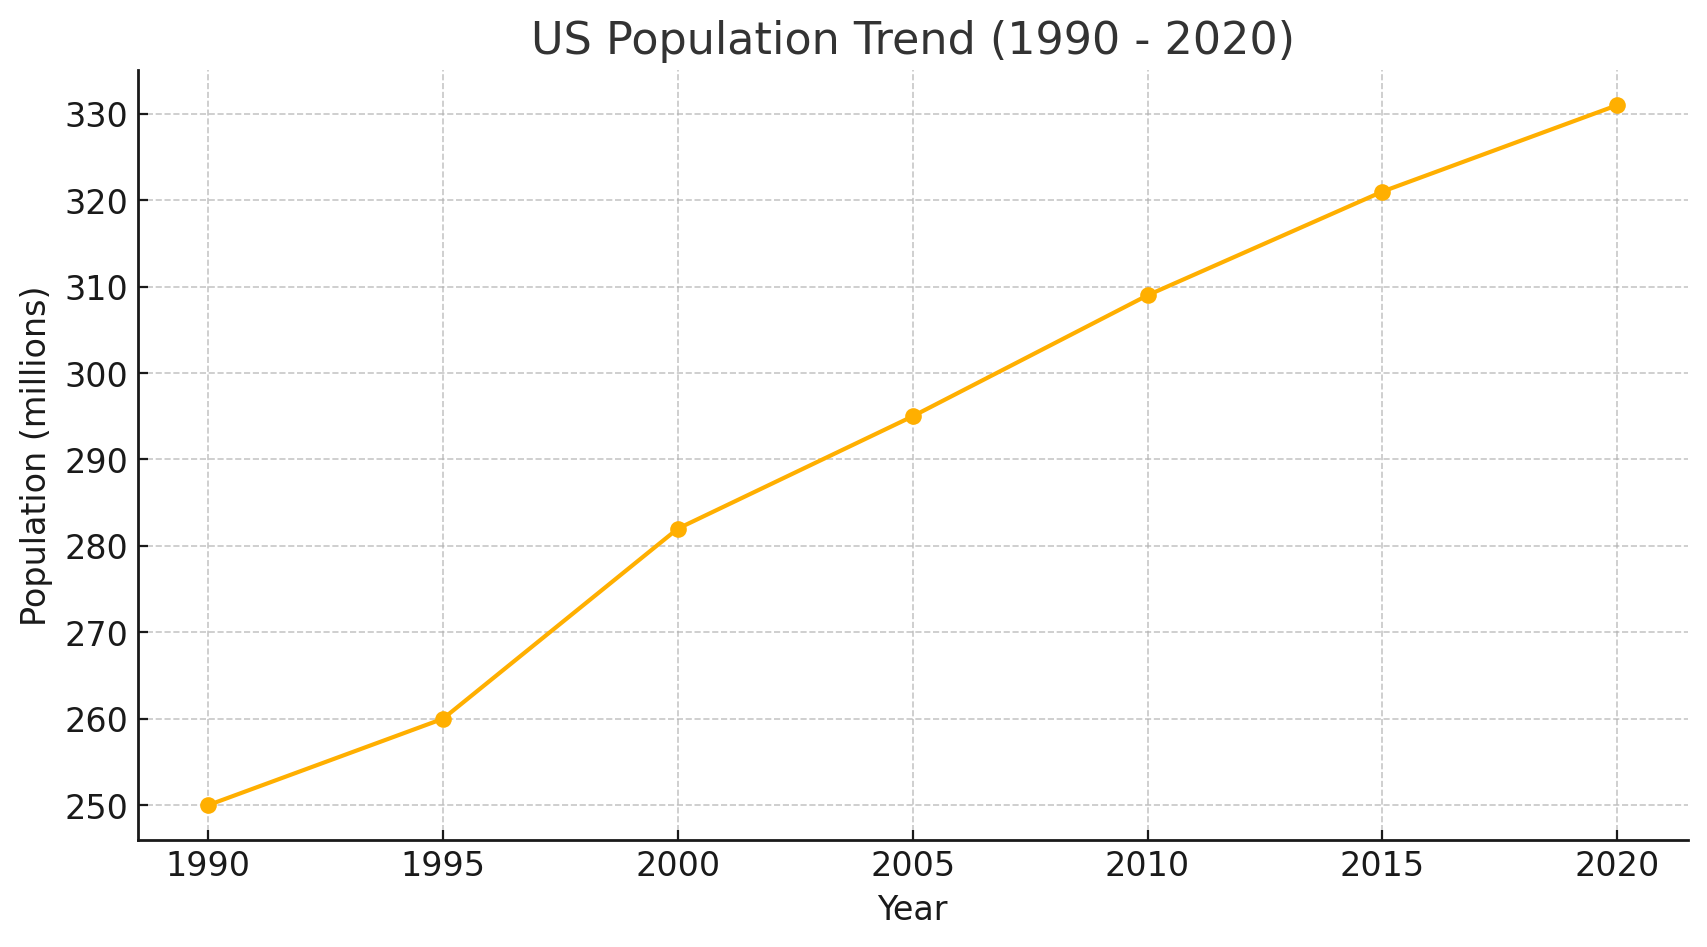

In [7]:
api_response = gpt_assistant.openai_client.files.with_raw_response.retrieve_content(
    "file-oHUjRWqs8J9CeWmmJJXqiEZ6"
)

if api_response.status_code == 200:
    content = api_response.content
    image_data_bytes = io.BytesIO(content)
    image = Image.open(image_data_bytes)
    display(image)